In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from scipy import optimize
from IPython.core.debugger import Tracer
%matplotlib inline

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
columns=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']

#High Perturbation System Analysis
Num_systh = highPerturbation['ident'].values[-1]+1
highp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systh):
    Current_syst = highPerturbation[highPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:11]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    highp_vars.loc[i]=row_vals
    
    
#Low Perturbation System Analysis
Num_systl = lowPerturbation['ident'].values[-1]+1
lowp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systl):
    Current_syst = lowPerturbation[lowPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:11]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    lowp_vars.loc[i]=row_vals

In [4]:
highp_vars.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,num_planets,mass_planets,mass_efficiency
0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.000,11.0,8.136583,62.589101
1,2.095099e+32,40.040195,3.201758,16.765976,0.019,1.0,0.3,1.0,0.1,-0.092791,3525593.500,13.0,2.827470,148.814199
2,5.354890e+32,40.647163,1.965345,67.644768,0.079,1.0,0.3,1.0,0.1,0.514770,9390406.000,9.0,7.979543,101.006870
3,3.614768e+32,29.539343,9.568532,16.213096,0.010,1.0,0.3,1.0,0.1,0.328146,1644710.625,18.0,6.944855,694.485525
4,2.885875e+32,61.195038,2.230675,15.866622,0.042,1.0,0.3,1.0,0.1,-0.220031,9468353.000,10.0,3.193649,76.039252


In [5]:
lowp_vars.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,num_planets,mass_planets,mass_efficiency
0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.1,1.0,0.1,0.077070,9268935.000,12.0,6.705383,51.579871
1,2.095099e+32,40.040195,3.201758,16.765976,0.019,1.0,0.1,1.0,0.1,-0.092791,3525593.500,8.0,2.725320,143.437891
2,5.354890e+32,40.647163,1.965345,67.644768,0.079,1.0,0.1,1.0,0.1,0.514770,9390406.000,12.0,10.749995,136.075885
3,3.614768e+32,29.539343,9.568532,16.213096,0.010,1.0,0.1,1.0,0.1,0.328146,1644710.625,23.0,6.397114,639.711381
4,2.885875e+32,61.195038,2.230675,15.866622,0.042,1.0,0.1,1.0,0.1,-0.220031,9468353.000,10.0,2.953130,70.312617


In [6]:
columns1=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
columns2=['num_planets','mass_planets','mass_efficiency']

hn = pd.DataFrame(columns=columns1)
ln = pd.DataFrame(columns=columns1)

rhn = pd.DataFrame(columns=columns2)
rln = pd.DataFrame(columns=columns2)


In [7]:
for i in range(len(columns1)):
    hn[columns1[i]]=highp_vars[columns1[i]]/max(highp_vars[columns1[i]])
    ln[columns1[i]]=lowp_vars[columns1[i]]/max(lowp_vars[columns1[i]])
for i in range(len(columns2)):
    rhn[columns2[i]]=highp_vars[columns2[i]]/max(highp_vars[columns2[i]])
    rln[columns2[i]]=lowp_vars[columns2[i]]/max(lowp_vars[columns2[i]])

In [8]:
hn.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0.364556,0.656938,0.023033,0.137702,0.406250,1.0,1.0,1.0,1.0,0.099482,0.928252
1,0.174851,0.439260,0.066394,0.045015,0.059375,1.0,1.0,1.0,1.0,-0.119776,0.353076
2,0.446904,0.445918,0.040755,0.181619,0.246875,1.0,1.0,1.0,1.0,0.664468,0.940417
3,0.301679,0.324060,0.198421,0.043530,0.031250,1.0,1.0,1.0,1.0,0.423572,0.164712
4,0.240847,0.671338,0.046257,0.042600,0.131250,1.0,1.0,1.0,1.0,-0.284017,0.948223


In [9]:
ln.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0.364556,0.656938,0.023033,0.137702,0.406250,1.0,1.0,1.0,1.0,0.099482,0.928252
1,0.174851,0.439260,0.066394,0.045015,0.059375,1.0,1.0,1.0,1.0,-0.119776,0.353076
2,0.446904,0.445918,0.040755,0.181619,0.246875,1.0,1.0,1.0,1.0,0.664468,0.940417
3,0.301679,0.324060,0.198421,0.043530,0.031250,1.0,1.0,1.0,1.0,0.423572,0.164712
4,0.240847,0.671338,0.046257,0.042600,0.131250,1.0,1.0,1.0,1.0,-0.284017,0.948223


In [149]:
y=np.zeros((len(rhn['num_planets']),1))
for i in range(len(rhn['num_planets'])):
    y[i]=rhn['num_planets'][i]

In [179]:
x=np.zeros((len(hn),len(columns1)))
for i in range(len(columns1)-1):
    for j in range(0,len(hn[columns1[i]])):
        x[j,i]=hn[columns1[i]][j]

In [238]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = len(columns1)
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        #Tracer()()
        self.yHat = self.forward(X) 
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1,dJdW2
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.

        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [239]:
NN=Neural_Network()

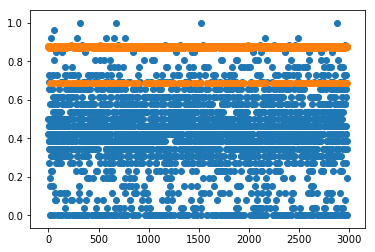

In [28]:
x=range(len(yh))
plt.scatter(x,rhn['num_planets'])
plt.scatter(x,yh)

In [243]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res
    

In [244]:
T=trainer(NN)

In [245]:
T.train(x,y)

         Current function value: 21.110381
         Iterations: 200
         Function evaluations: 228
         Gradient evaluations: 228
